In [1]:
# Import dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:

# Declare each array, latitude (lats) and longitude (lngs), as variables. Pair lats & lngs by zipping them 
# (lat_lngs) by using the zip() function.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

In [3]:
# Output is a zip object in memory.

lat_lngs

In [4]:
# Order pairs of latitudes and longitudes into a list. This makes it easier to iterate through the list of tuples.

coordinates = list(lat_lngs)

In [5]:
# Import citipy module.

from citipy import citipy

In [6]:
# Create a list for holding the cities.
# Create a for loop to identify the nearest cities based on latitude and longiture combinations in the zip file.
# Create an if Statement: If the city is unique, add to the cities list.

cities = []

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)

In [7]:

# Use the len() function to find out the # of cities in the list. Need at least 500 for this exercise.

len(cities)

613

In [8]:
# Add the Python Requests Library and check version (should be 2.22 or later).

import requests

requests.__version__


'2.22.0'

In [9]:
# Import the API key.

from config import weather_api_key


In [10]:
# Import the datetime module from the datetime library

from datetime import datetime


In [11]:
# Create an empty list to hold the weather data, print the beginning of the logging, and create counters.

city_data = []

print("Beginning Data Retrieval      ")
print("------------------------------")

record_count = 1
set_count = 1


Beginning Data Retrieval      
------------------------------


In [12]:
# Build the basic city URL.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [13]:
# Loop through all the cities in the list & group them in sets of 50 for logging, and create the basic URL.
# This method doesn't work because "i" adds the index # and not the city.

for i in range(len(cities)):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    city_url = url + "&q=" + "i"   


In [14]:
# Use the enumerate() method as an alternative way to iterate through the list of cities and retrieve both, the 
# index and the city.

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    city_url = url + "&q=" + city
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1


Processing Record 1 of Set 13 | dorokhovo
Processing Record 2 of Set 13 | awjilah
Processing Record 3 of Set 13 | busselton
Processing Record 4 of Set 13 | ribeira grande
Processing Record 5 of Set 13 | snezhnogorsk
Processing Record 6 of Set 13 | ushuaia
Processing Record 7 of Set 13 | saint george
Processing Record 8 of Set 13 | genhe
Processing Record 9 of Set 13 | manikganj
Processing Record 10 of Set 13 | byron bay
Processing Record 11 of Set 13 | vila velha
Processing Record 12 of Set 13 | albany
Processing Record 13 of Set 13 | rikitea
Processing Record 14 of Set 13 | hermanus
Processing Record 15 of Set 13 | kota belud
Processing Record 16 of Set 13 | kavieng
Processing Record 17 of Set 13 | presidencia roque saenz pena
Processing Record 18 of Set 13 | bethel
Processing Record 19 of Set 13 | esperance
Processing Record 20 of Set 13 | hualmay
Processing Record 21 of Set 13 | bafq
Processing Record 22 of Set 13 | isangel
Processing Record 23 of Set 13 | oranjemund
Processing Reco

In [15]:
# Apply a try-except block to skip records with issues.

print("Beginning Data Retrieval      ")
print("------------------------------")
for i, city in enumerate(cities):
    if (i %50 == 0 and i >=50):
        set_count += 1
        record_count = 1
    city_url = url + "&q=" + city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1
    
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval      
------------------------------
Processing Record 14 of Set 25 | dorokhovo
Processing Record 15 of Set 25 | awjilah
Processing Record 16 of Set 25 | busselton
Processing Record 17 of Set 25 | ribeira grande
Processing Record 18 of Set 25 | snezhnogorsk
Processing Record 19 of Set 25 | ushuaia
Processing Record 20 of Set 25 | saint george
Processing Record 21 of Set 25 | genhe
Processing Record 22 of Set 25 | manikganj
City not found. Skipping...
Processing Record 23 of Set 25 | byron bay
Processing Record 24 of Set 25 | vila velha
Processing Record 25 of Set 25 | albany
Processing Record 26 of Set 25 | rikitea
Processing Record 27 of Set 25 | hermanus
Processing Record 28 of Set 25 | kota belud
Processing Record 29 of Set 25 | kavieng
Processing Record 30 of Set 25 | presidencia roque saenz pena
Processing Record 31 of Set 25 | bethel
Processing Record 32 of Set 25 | esperance
Processing Record 33 of Set 25 | hualmay
Processing Record 34 of Set 25 | bafq
P

Processing Record 33 of Set 28 | sur
Processing Record 34 of Set 28 | port-cartier
Processing Record 35 of Set 28 | sidi ali
Processing Record 36 of Set 28 | yeppoon
Processing Record 37 of Set 28 | potsdam
Processing Record 38 of Set 28 | samana
Processing Record 39 of Set 28 | ixtapa
Processing Record 40 of Set 28 | kismayo
City not found. Skipping...
Processing Record 41 of Set 28 | kodiak
Processing Record 42 of Set 28 | kloulklubed
Processing Record 43 of Set 28 | bambanglipuro
Processing Record 44 of Set 28 | fort nelson
Processing Record 45 of Set 28 | kurchum
Processing Record 46 of Set 28 | tsihombe
City not found. Skipping...
Processing Record 47 of Set 28 | bathsheba
Processing Record 48 of Set 28 | musoma
Processing Record 49 of Set 28 | rolim de moura
City not found. Skipping...
Processing Record 50 of Set 28 | mandalgovi
Processing Record 1 of Set 29 | tevriz
Processing Record 2 of Set 29 | mar del plata
Processing Record 3 of Set 29 | umm lajj
Processing Record 4 of Set 

Processing Record 16 of Set 32 | bilma
Processing Record 17 of Set 32 | lorengau
Processing Record 18 of Set 32 | asau
City not found. Skipping...
Processing Record 19 of Set 32 | linjiang
Processing Record 20 of Set 32 | margate
Processing Record 21 of Set 32 | norman wells
Processing Record 22 of Set 32 | jackson
Processing Record 23 of Set 32 | dibulla
Processing Record 24 of Set 32 | duminichi
Processing Record 25 of Set 32 | hervey bay
Processing Record 26 of Set 32 | karratha
Processing Record 27 of Set 32 | peniche
Processing Record 28 of Set 32 | chizhou
Processing Record 29 of Set 32 | hihifo
City not found. Skipping...
Processing Record 30 of Set 32 | clyde river
Processing Record 31 of Set 32 | bengkulu
City not found. Skipping...
Processing Record 32 of Set 32 | tres passos
Processing Record 33 of Set 32 | fortuna
Processing Record 34 of Set 32 | allanmyo
City not found. Skipping...
Processing Record 35 of Set 32 | los llanos de aridane
Processing Record 36 of Set 32 | sao 

Processing Record 45 of Set 35 | kosa
Processing Record 46 of Set 35 | yanai
Processing Record 47 of Set 35 | acapulco
Processing Record 48 of Set 35 | koumac
Processing Record 49 of Set 35 | adrar
Processing Record 50 of Set 35 | sussex
Processing Record 1 of Set 36 | greenville
Processing Record 2 of Set 36 | la primavera
Processing Record 3 of Set 36 | angouleme
Processing Record 4 of Set 36 | pietarsaari
City not found. Skipping...
Processing Record 5 of Set 36 | qandala
Processing Record 6 of Set 36 | longmont
Processing Record 7 of Set 36 | anadyr
Processing Record 8 of Set 36 | rurrenabaque
Processing Record 9 of Set 36 | nador
Processing Record 10 of Set 36 | winsum
Processing Record 11 of Set 36 | rawson
Processing Record 12 of Set 36 | souillac
Processing Record 13 of Set 36 | shetpe
Processing Record 14 of Set 36 | havelock
Processing Record 15 of Set 36 | nagato
Processing Record 16 of Set 36 | livingstonia
Processing Record 17 of Set 36 | victor harbor
Processing Record 18

In [16]:
len(city_data)


547

In [65]:
# Convert dictionaries in city_data to a DataFrame.

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dorokhovo,55.55,36.37,33.80,94,90,13.42,RU,2020-01-03 05:13:14
1,Awjilah,29.14,21.30,44.38,85,0,6.49,LY,2020-01-03 05:09:39
2,Busselton,-33.64,115.35,73.00,22,37,17.87,AU,2020-01-03 05:13:15
3,Ribeira Grande,38.52,-28.70,55.11,76,0,12.06,PT,2020-01-03 05:12:23
4,Snezhnogorsk,69.19,33.23,35.60,93,75,4.47,RU,2020-01-03 05:13:15
5,Ushuaia,-54.81,-68.31,48.20,49,4,17.22,AR,2020-01-03 05:08:17
6,Saint George,39.45,22.34,35.01,85,20,3.36,GR,2020-01-03 05:12:24
7,Genhe,50.78,121.52,-4.20,88,77,3.36,CN,2020-01-03 05:13:15
8,Byron Bay,-28.65,153.62,87.80,45,0,17.22,AU,2020-01-03 05:13:16
9,Vila Velha,-3.71,-38.60,86.00,83,40,3.36,BR,2020-01-03 05:12:52


In [68]:
# Reorder the columns by assigning a variable to the new order, then assigning it to the DataFrame.

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dorokhovo,RU,2020-01-03 05:13:14,55.55,36.37,33.80,94,90,13.42
1,Awjilah,LY,2020-01-03 05:09:39,29.14,21.30,44.38,85,0,6.49
2,Busselton,AU,2020-01-03 05:13:15,-33.64,115.35,73.00,22,37,17.87
3,Ribeira Grande,PT,2020-01-03 05:12:23,38.52,-28.70,55.11,76,0,12.06
4,Snezhnogorsk,RU,2020-01-03 05:13:15,69.19,33.23,35.60,93,75,4.47
5,Ushuaia,AR,2020-01-03 05:08:17,-54.81,-68.31,48.20,49,4,17.22
6,Saint George,GR,2020-01-03 05:12:24,39.45,22.34,35.01,85,20,3.36
7,Genhe,CN,2020-01-03 05:13:15,50.78,121.52,-4.20,88,77,3.36
8,Byron Bay,AU,2020-01-03 05:13:16,-28.65,153.62,87.80,45,0,17.22
9,Vila Velha,BR,2020-01-03 05:12:52,-3.71,-38.60,86.00,83,40,3.36


In [67]:
# Create a CSV output file and save in a new "weather_data" folder.

output_data_file = "weather_data/cities.csv"

city_data_df.to_csv(output_data_file, index_label="City_ID")


In [60]:
city_data_df.index.name = "City_ID"

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
City_ID,,,,,,,,,
0,Dorokhovo,RU,2020-01-03 05:13:14,55.55,36.37,33.80,94,90,13.42
1,Awjilah,LY,2020-01-03 05:09:39,29.14,21.30,44.38,85,0,6.49
2,Busselton,AU,2020-01-03 05:13:15,-33.64,115.35,73.00,22,37,17.87
3,Ribeira Grande,PT,2020-01-03 05:12:23,38.52,-28.70,55.11,76,0,12.06
4,Snezhnogorsk,RU,2020-01-03 05:13:15,69.19,33.23,35.60,93,75,4.47
5,Ushuaia,AR,2020-01-03 05:08:17,-54.81,-68.31,48.20,49,4,17.22
6,Saint George,GR,2020-01-03 05:12:24,39.45,22.34,35.01,85,20,3.36
7,Genhe,CN,2020-01-03 05:13:15,50.78,121.52,-4.20,88,77,3.36
8,Byron Bay,AU,2020-01-03 05:13:16,-28.65,153.62,87.80,45,0,17.22


## LESSON 3: Plot Weather Data.

In [51]:
# Extract relevant fields from the city_data_df for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [52]:
# Import the time module instead of datetime to add the current date to the scatter plot title.
# Use time.time() to get today's date in seconds.

import time

today = time.time()

today


1578038651.055247

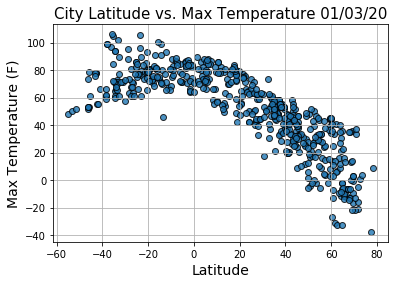

In [35]:
# Build a scatter plot for latitude vs. max temp.

plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the strftime() format method with "%x" to get xx/xx/xx date format.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"), fontsize=15)
plt.ylabel("Max Temperature (F)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

plt.show()


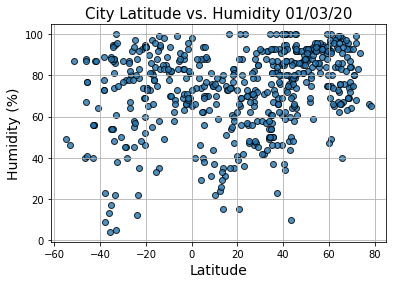

In [36]:
# Plot latitude vs. humidity.

plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"), fontsize=15)
plt.ylabel("Humidity (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.grid(True)

plt.savefig("weather_data/Fig2.png")

plt.show()


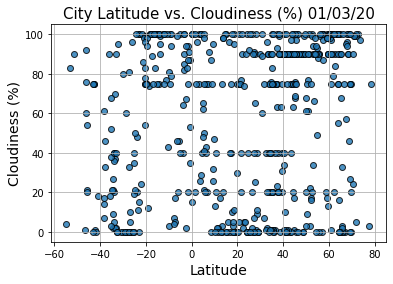

In [37]:
# Plot latitude vs. cloudiness.

plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"), fontsize=15)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.grid(True)

plt.savefig("weather_data/Fig3.png")

plt.show()


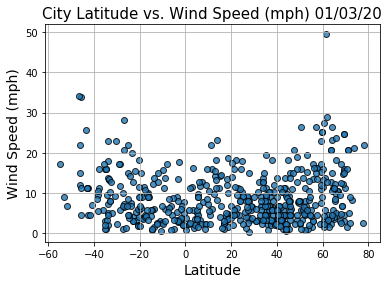

In [38]:
# Plot latitude vs. wind speed.

plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"), fontsize=15)
plt.ylabel("Wind Speed (mph)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.grid(True)

plt.savefig("weather_data/Fig4.png")

plt.show()


## 6.4.2 - Find the Correlation Between Latitude & Max Temperature.

In [39]:
# Import linear regression.

from scipy.stats import linregress


In [125]:
# Create a function to perform linear regression, plot the line & the equation.
 
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate regression line y-values from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude', fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.title(title, fontsize=14)
    
    plt.show()
    

In [107]:
# The above code produces no output until the fuction is called with the 5 parameters.

In [108]:
# Create the Hemispheres DataFrames using the loc method (to create DF from another DF).

index13 = city_data_df.loc[13]

index13

City                   Kota Belud
Country                        MY
Date          2020-01-03 05:13:16
Lat                          6.35
Lng                        116.43
Max Temp                       88
Humidity                       70
Cloudiness                     75
Wind Speed                   3.36
Name: 13, dtype: object

In [109]:
# DataFrame can also be filtered based on row values: This code returns True or False for Latitudes >= 0.

city_data_df["Lat"] >= 0


City_ID
0       True
1       True
2      False
3       True
4       True
       ...  
542     True
543     True
544    False
545     True
546     True
Name: Lat, Length: 547, dtype: bool

In [110]:
city_data_df.index.name = "City_ID"

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
City_ID,,,,,,,,,
0,Dorokhovo,RU,2020-01-03 05:13:14,55.55,36.37,33.80,94,90,13.42
1,Awjilah,LY,2020-01-03 05:09:39,29.14,21.30,44.38,85,0,6.49
2,Busselton,AU,2020-01-03 05:13:15,-33.64,115.35,73.00,22,37,17.87
3,Ribeira Grande,PT,2020-01-03 05:12:23,38.52,-28.70,55.11,76,0,12.06
4,Snezhnogorsk,RU,2020-01-03 05:13:15,69.19,33.23,35.60,93,75,4.47
5,Ushuaia,AR,2020-01-03 05:08:17,-54.81,-68.31,48.20,49,4,17.22
6,Saint George,GR,2020-01-03 05:12:24,39.45,22.34,35.01,85,20,3.36
7,Genhe,CN,2020-01-03 05:13:15,50.78,121.52,-4.20,88,77,3.36
8,Byron Bay,AU,2020-01-03 05:13:16,-28.65,153.62,87.80,45,0,17.22


In [111]:
# Use the loc function to pull Latitudes >= 0 & use head() to get the first 5 rows since this is a DF.

city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
City_ID,,,,,,,,,
0,Dorokhovo,RU,2020-01-03 05:13:14,55.55,36.37,33.80,94,90,13.42
1,Awjilah,LY,2020-01-03 05:09:39,29.14,21.30,44.38,85,0,6.49
3,Ribeira Grande,PT,2020-01-03 05:12:23,38.52,-28.70,55.11,76,0,12.06
4,Snezhnogorsk,RU,2020-01-03 05:13:15,69.19,33.23,35.60,93,75,4.47
6,Saint George,GR,2020-01-03 05:12:24,39.45,22.34,35.01,85,20,3.36


In [112]:
# Create Northern & Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


In [113]:
# Perform linear regression on the Max Temp for the Northern Hemisphere.

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function: def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)
# The way it's written in the lesson produces an ERROR.


plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(10,40))


SyntaxError: EOL while scanning string literal (<ipython-input-113-44b8b745031c>, line 11)

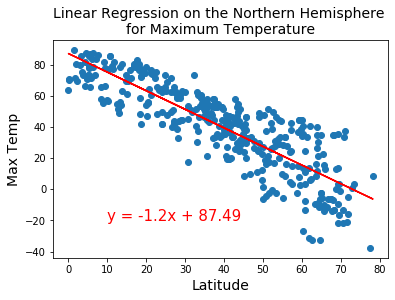

In [126]:
# Applied fix to linear regression function by adding plt.title and fontsize, incl. to x & y labels.
# Added single quotation marks where title splits: after \n and before for.
# Adjusted text_coordinates for visibility.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                       'for Maximum Temperature', 'Max Temp',(10, -20))


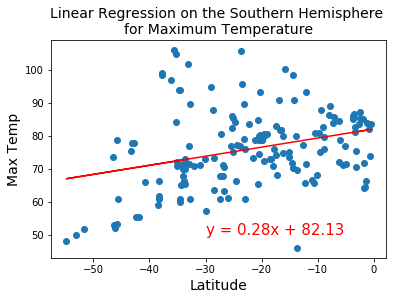

In [131]:
# Linear regression on the Southern Hemisphere.

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                       'for Maximum Temperature', 'Max Temp',(-30, 50))


In [132]:
# FINDINGS: The correlation between latitude and maximum temperature is strong because by looking at the Northern
# and Southern Hemispheres scatter plots, temperatures increase as they get closer to 0 latitude or closer to the
# equator. Temperatures get cooler in latitudes further away from the equator.

## 6.4.3 - Find the Correlation Between Latitude & Percent Humidity.

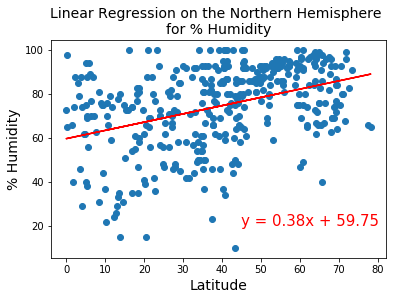

In [137]:
# Linear regression on the Northern Hemisphere.

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                       'for % Humidity', '% Humidity',(45, 20))


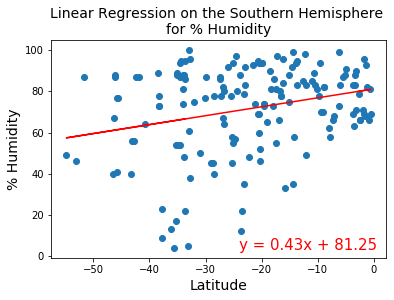

In [149]:
# Linear regression on the Southern Hemisphere.

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                       'for % Humidity', '% Humidity',(-24, 3))


In [ ]:
# FINDINGS: The correlation between latitude and % humidity appears to be low, most likely due to the fact humidity
# levels are unpredictable. Scatter plots show r-values of 0.38 and 0.43 which support humidity levels are hard to
# predict.

## 6.4.4 - Find the Correlation Between Latitude & Percent Cloudiness.

In [151]:
'''SKILL DRILL: Linear regression for Northern & Southern Hemispheres.'''

'SKILL DRILL: Linear regression for Northern & Southern Hemispheres.'

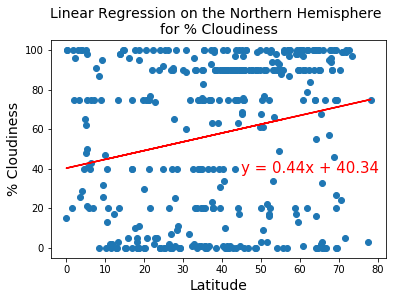

In [155]:
# Linear regression on the Northern Hemisphere.

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                       'for % Cloudiness', '% Cloudiness',(45, 38))


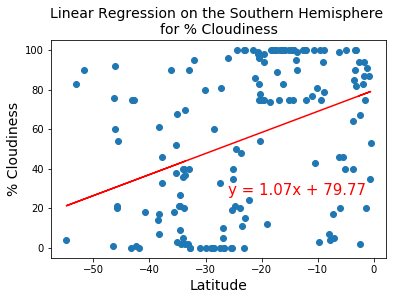

In [160]:
# Linear regression on the Southern Hemisphere.

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                       'for % Cloudiness', '% Cloudiness',(-26, 27))


In [ ]:
# FINDINGS: The correlation between latitude and % cloudiness is very low. Just like humidity, cloudiness levels
# re unpredictable. Scatter plots show r-values of 0.44 and 1.07 which support how hard it is to predict.


## 6.4.5 - Find the Correlation Between Latitude & Wind Speed.

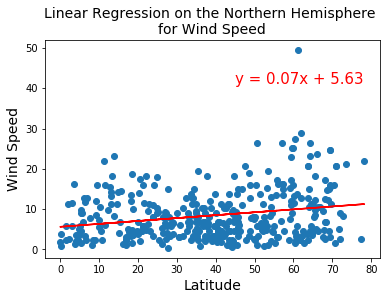

In [172]:
# Linear regression on the Northern Hemisphere.

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                       'for Wind Speed', 'Wind Speed',(45, 41))


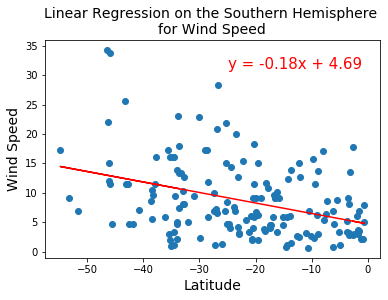

In [170]:
# Linear regression on the Southern Hemisphere.

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                       'for Wind Speed', 'Wind Speed',(-25, 31))


In [173]:
# FINDINGS: The correlation between latitude and wind speed is very low. Just like humidity and cloudiness, wind 
# speeds are unpredictable. Scatter plots show r-values of 0.07 and -018 which support this statement.
